(sec:mlp)=
# Multi Layer Perceptrons (MLP)

In the previous chapter, we have seen a very simple model called the Perceptron.
In this model, the predicted output $\hat{y}$ is computed as a linear combination of the input features plus a bias:

$$\hat{y} = \sum_{j=1}^d x_j w_j + b$$

In other words, we were optimizing among the family of linear models, which is a quite restricted family.

## Stacking layers for better expressivity

In order to cover a wider range of models, one can stack neurons organized in layers to form a more complex model, such as the model below, which is called a one-hidden-layer model, since an extra layer of neurons is introduced between the inputs and the output:

```{tikz}
    \node[text width=3cm, align=center] (in_title) at  (0, 6) {Input layer\\ $\mathbf{x}$};
    \node[text width=3cm, align=center] (h1_title) at  (3, 6) {Hidden layer 1\\ $\mathbf{h^{(1)}}$};
    \node[text width=3cm, align=center] (out_title) at  (6, 6) {Output layer\\ $\mathbf{\hat{y}}$};

    \node[draw, circle, fill=blue, minimum size=17pt,inner sep=0pt] (in0) at  (0, 4) {};
    \node[draw, circle, fill=blue, minimum size=17pt,inner sep=0pt] (in1) at  (0, 3) {};
    \node[draw, circle, fill=blue, minimum size=17pt,inner sep=0pt] (in2) at  (0, 2) {};
    \node[draw, circle, fill=blue, minimum size=17pt,inner sep=0pt] (in3) at  (0, 1) {};
    \node[draw, circle, fill=blue, minimum size=17pt,inner sep=0pt] (in4) at  (0, 0) {};

    \node[draw, circle, minimum size=17pt,inner sep=0pt] (h1_0) at  (3, 5) {};
    \node[draw, circle, minimum size=17pt,inner sep=0pt] (h1_1) at  (3, 4) {};
    \node[draw, circle, minimum size=17pt,inner sep=0pt] (h1_2) at  (3, 3) {};
    \node[draw, circle, minimum size=17pt,inner sep=0pt] (h1_3) at  (3, 2) {};
    \node[draw, circle, minimum size=17pt,inner sep=0pt] (h1_4) at  (3, 1) {};
    \node[draw, circle, minimum size=17pt,inner sep=0pt] (h1_5) at  (3, 0) {};
    \node[draw, circle, minimum size=17pt,inner sep=0pt] (h1_6) at  (3, -1) {};
    
    \node[draw, circle, fill=green, minimum size=17pt,inner sep=0pt] (out_0) at  (6, 2) {};
    \draw[->] (in0) -- (h1_0);
    \draw[->] (in0) -- (h1_1);
    \draw[->] (in0) -- (h1_2);
    \draw[->] (in0) -- (h1_3);
    \draw[->] (in0) -- (h1_4);
    \draw[->] (in0) -- (h1_5);
    \draw[->] (in0) -- (h1_6);
    \draw[->] (in1) -- (h1_0);
    \draw[->] (in1) -- (h1_1);
    \draw[->] (in1) -- (h1_2);
    \draw[->] (in1) -- (h1_3);
    \draw[->] (in1) -- (h1_4);
    \draw[->] (in1) -- (h1_5);
    \draw[->] (in1) -- (h1_6);
    \draw[->] (in2) -- (h1_0);
    \draw[->] (in2) -- (h1_1);
    \draw[->] (in2) -- (h1_2);
    \draw[->] (in2) -- (h1_3);
    \draw[->] (in2) -- (h1_4);
    \draw[->] (in2) -- (h1_5);
    \draw[->] (in2) -- (h1_6);
    \draw[->] (in3) -- (h1_0);
    \draw[->] (in3) -- (h1_1);
    \draw[->] (in3) -- (h1_2);
    \draw[->] (in3) -- (h1_3);
    \draw[->] (in3) -- (h1_4);
    \draw[->] (in3) -- (h1_5);
    \draw[->] (in3) -- (h1_6);
    \draw[->] (in4) -- (h1_0);
    \draw[->] (in4) -- (h1_1);
    \draw[->] (in4) -- (h1_2);
    \draw[->] (in4) -- (h1_3);
    \draw[->] (in4) -- (h1_4);
    \draw[->] (in4) -- (h1_5);
    \draw[->] (in4) -- (h1_6);
    \draw[->] (h1_0) -- (out_0);
    \draw[->] (h1_1) -- (out_0);
    \draw[->] (h1_2) -- (out_0);
    \draw[->] (h1_3) -- (out_0);
    \draw[->] (h1_4) -- (out_0);
    \draw[->] (h1_5) -- (out_0);
    \draw[->] (h1_6) -- (out_0);


    \node[fill=white] (beta0) at  (1.5, 2) {$\mathbf{w^{(0)}}$};
    \node[fill=white] (beta1) at  (4.5, 2) {$\mathbf{w^{(1)}}$};
```

The question one might ask now is whether this added hidden layer effectively allows to cover a wider family of models.
This is what the Universal Approximation Theorem below is all about.

```{admonition} Universal Approximation Theorem

The Universal Approximation Theorem states that any continuous function defined on a compact set can be 
approximated as closely as one wants by a one-hidden-layer neural network with sigmoid activation.
```

In other words, by using a hidden layer to map inputs to outputs, one can now approximate any continuous function, which is a very interesting property.
Note however that the number of hidden neurons that is necessary to achieve a given approximation quality is not discussed here.
Moreover, it is not sufficient that such a good approximation exists, another important question is whether the optimization algorithms we will use will eventually converge to this solution or not, which is not guaranteed, as discussed in more details in [the dedicated chapter](sec:sgd).

In practice, we observe empirically that in order to achieve a given approximation quality, it is more efficient (in terms of the number of parameters required) to stack several hidden layers rather than rely on a single one :

```{tikz}
    \node[text width=3cm, align=center] (in_title) at  (0, 6) {Input layer\\ $\mathbf{x}$};
    \node[text width=3cm, align=center] (h1_title) at  (3, 6) {Hidden layer 1\\ $\mathbf{h^{(1)}}$};
    \node[text width=3cm, align=center] (h1_title) at  (6, 6) {Hidden layer 2\\ $\mathbf{h^{(2)}}$};
    \node[text width=3cm, align=center] (out_title) at  (9, 6) {Output layer\\ $\mathbf{\hat{y}}$};

    \node[draw, circle, fill=blue, minimum size=17pt,inner sep=0pt] (in0) at  (0, 4) {};
    \node[draw, circle, fill=blue, minimum size=17pt,inner sep=0pt] (in1) at  (0, 3) {};
    \node[draw, circle, fill=blue, minimum size=17pt,inner sep=0pt] (in2) at  (0, 2) {};
    \node[draw, circle, fill=blue, minimum size=17pt,inner sep=0pt] (in3) at  (0, 1) {};
    \node[draw, circle, fill=blue, minimum size=17pt,inner sep=0pt] (in4) at  (0, 0) {};

    \node[draw, circle, fill=cyan, minimum size=17pt,inner sep=0pt] (h1_0) at  (3, 5) {};
    \node[draw, circle, fill=cyan, minimum size=17pt,inner sep=0pt] (h1_1) at  (3, 4) {};
    \node[draw, circle, fill=cyan, minimum size=17pt,inner sep=0pt] (h1_2) at  (3, 3) {};
    \node[draw, circle, fill=cyan, minimum size=17pt,inner sep=0pt] (h1_3) at  (3, 2) {};
    \node[draw, circle, fill=cyan, minimum size=17pt,inner sep=0pt] (h1_4) at  (3, 1) {};
    \node[draw, circle, fill=cyan, minimum size=17pt,inner sep=0pt] (h1_5) at  (3, 0) {};
    \node[draw, circle, fill=cyan, minimum size=17pt,inner sep=0pt] (h1_6) at  (3, -1) {};

    \node[draw, circle, fill=teal, minimum size=17pt,inner sep=0pt] (h2_0) at  (6, 5) {};
    \node[draw, circle, fill=teal, minimum size=17pt,inner sep=0pt] (h2_1) at  (6, 4) {};
    \node[draw, circle, fill=teal, minimum size=17pt,inner sep=0pt] (h2_2) at  (6, 3) {};
    \node[draw, circle, fill=teal, minimum size=17pt,inner sep=0pt] (h2_3) at  (6, 2) {};
    \node[draw, circle, fill=teal, minimum size=17pt,inner sep=0pt] (h2_4) at  (6, 1) {};
    \node[draw, circle, fill=teal, minimum size=17pt,inner sep=0pt] (h2_5) at  (6, 0) {};
    \node[draw, circle, fill=teal, minimum size=17pt,inner sep=0pt] (h2_6) at  (6, -1) {};
    
    \node[draw, circle, fill=green, minimum size=17pt,inner sep=0pt] (out_0) at  (9, 2) {};
    \draw[->] (in0) -- (h1_0);
    \draw[->] (in0) -- (h1_1);
    \draw[->] (in0) -- (h1_2);
    \draw[->] (in0) -- (h1_3);
    \draw[->] (in0) -- (h1_4);
    \draw[->] (in0) -- (h1_5);
    \draw[->] (in0) -- (h1_6);
    \draw[->] (in1) -- (h1_0);
    \draw[->] (in1) -- (h1_1);
    \draw[->] (in1) -- (h1_2);
    \draw[->] (in1) -- (h1_3);
    \draw[->] (in1) -- (h1_4);
    \draw[->] (in1) -- (h1_5);
    \draw[->] (in1) -- (h1_6);
    \draw[->] (in2) -- (h1_0);
    \draw[->] (in2) -- (h1_1);
    \draw[->] (in2) -- (h1_2);
    \draw[->] (in2) -- (h1_3);
    \draw[->] (in2) -- (h1_4);
    \draw[->] (in2) -- (h1_5);
    \draw[->] (in2) -- (h1_6);
    \draw[->] (in3) -- (h1_0);
    \draw[->] (in3) -- (h1_1);
    \draw[->] (in3) -- (h1_2);
    \draw[->] (in3) -- (h1_3);
    \draw[->] (in3) -- (h1_4);
    \draw[->] (in3) -- (h1_5);
    \draw[->] (in3) -- (h1_6);
    \draw[->] (in4) -- (h1_0);
    \draw[->] (in4) -- (h1_1);
    \draw[->] (in4) -- (h1_2);
    \draw[->] (in4) -- (h1_3);
    \draw[->] (in4) -- (h1_4);
    \draw[->] (in4) -- (h1_5);
    \draw[->] (in4) -- (h1_6);

    \draw[->] (h1_0) -- (h2_0);
    \draw[->] (h1_1) -- (h2_0);
    \draw[->] (h1_2) -- (h2_0);
    \draw[->] (h1_3) -- (h2_0);
    \draw[->] (h1_4) -- (h2_0);
    \draw[->] (h1_5) -- (h2_0);
    \draw[->] (h1_6) -- (h2_0);
    \draw[->] (h1_0) -- (h2_1);
    \draw[->] (h1_1) -- (h2_1);
    \draw[->] (h1_2) -- (h2_1);
    \draw[->] (h1_3) -- (h2_1);
    \draw[->] (h1_4) -- (h2_1);
    \draw[->] (h1_5) -- (h2_1);
    \draw[->] (h1_6) -- (h2_1);
    \draw[->] (h1_0) -- (h2_2);
    \draw[->] (h1_1) -- (h2_2);
    \draw[->] (h1_2) -- (h2_2);
    \draw[->] (h1_3) -- (h2_2);
    \draw[->] (h1_4) -- (h2_2);
    \draw[->] (h1_5) -- (h2_2);
    \draw[->] (h1_6) -- (h2_2);
    \draw[->] (h1_0) -- (h2_3);
    \draw[->] (h1_1) -- (h2_3);
    \draw[->] (h1_2) -- (h2_3);
    \draw[->] (h1_3) -- (h2_3);
    \draw[->] (h1_4) -- (h2_3);
    \draw[->] (h1_5) -- (h2_3);
    \draw[->] (h1_6) -- (h2_3);
    \draw[->] (h1_0) -- (h2_4);
    \draw[->] (h1_1) -- (h2_4);
    \draw[->] (h1_2) -- (h2_4);
    \draw[->] (h1_3) -- (h2_4);
    \draw[->] (h1_4) -- (h2_4);
    \draw[->] (h1_5) -- (h2_4);
    \draw[->] (h1_6) -- (h2_4);
    \draw[->] (h1_0) -- (h2_5);
    \draw[->] (h1_1) -- (h2_5);
    \draw[->] (h1_2) -- (h2_5);
    \draw[->] (h1_3) -- (h2_5);
    \draw[->] (h1_4) -- (h2_5);
    \draw[->] (h1_5) -- (h2_5);
    \draw[->] (h1_6) -- (h2_5);
    \draw[->] (h1_0) -- (h2_6);
    \draw[->] (h1_1) -- (h2_6);
    \draw[->] (h1_2) -- (h2_6);
    \draw[->] (h1_3) -- (h2_6);
    \draw[->] (h1_4) -- (h2_6);
    \draw[->] (h1_5) -- (h2_6);
    \draw[->] (h1_6) -- (h2_6);

    \draw[->] (h2_0) -- (out_0);
    \draw[->] (h2_1) -- (out_0);
    \draw[->] (h2_2) -- (out_0);
    \draw[->] (h2_3) -- (out_0);
    \draw[->] (h2_4) -- (out_0);
    \draw[->] (h2_5) -- (out_0);
    \draw[->] (h2_6) -- (out_0);


    \node[fill=white] (beta0) at  (1.5, 2) {$\mathbf{w^{(0)}}$};
    \node[fill=white] (beta1) at  (4.5, 2) {$\mathbf{w^{(1)}}$};
    \node[fill=white] (beta2) at  (7.5, 2) {$\mathbf{w^{(2)}}$};
```

The above graphical representation corresponds to the following model:

\begin{align}
  {\color[rgb]{0,1,0}\hat{y}} &= \varphi_\text{out} \left( \sum_i w^{(2)}_{i} {\color{teal}h^{(2)}_{i}} + b^{(2)} \right) \\
  \forall i, {\color{teal}h^{(2)}_{i}} &= \varphi \left( \sum_j w^{(1)}_{ij} {\color[rgb]{0.16,0.61,0.91}h^{(1)}_{j}} + b^{(1)}_{i} \right) \\
  \forall i, {\color[rgb]{0.16,0.61,0.91}h^{(1)}_{i}} &= \varphi \left( \sum_j w^{(0)}_{ij} {\color{blue}x_{j}} + b^{(0)}_{i} \right)
  \label{eq:mlp_2hidden}
\end{align}

To be even more precise, the bias terms $b^{(l)}_i$ are not represented in the graphical representation above.

Such models with one or more hidden layers are called **Multi Layer Perceptrons** (MLP).

## Deciding on an MLP architecture

When designing a Multi-Layer Perceptron model to be used for a specific problem, some quantities are fixed by the problem at hand and other are left as hyper-parameters.

Let us take the example of the well-known Iris classification dataset:

In [1]:
import pandas as pd

iris = pd.read_csv("data/iris.csv", index_col=0)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


The goal here is to learn how to infer the `target` attribute (3 different possible classes) from the information in the 4 other attributes.

The structure of this dataset dictates:
* the number of neurons in the input layer, which is equal to the number of descriptive attributes in our dataset (here, 4), and
* the number of neurons in the output layer, which is here equal to 3, since the model is expected to output one probability per target class.

In more generality, for the output layer, one might face several situations:
* when regression is at stake, the number of neurons in the output layer is equal to the number of features to be predicted by the model,
* when it comes to classification
  * in the case of binary classification, the model will have a single output neuron which will indicate the probability of the positive class
  * in the case of multi-class classification, the model will have as many output neurons as the number of classes in the problem.

Once these number of input / output neurons are fixed, the number of hidden neurons as well as the number of neurons per hidden layer are left as hyper-parameters of the model.

## Activation functions

Another important hyper-parameter of neural networks is the choice of the activation function $\varphi$.

Here, it is important to notice that if we used the identity function as our activation function, then whatever the depth of our MLP, we would fall back to covering only the family of linear models.
In practice, we will then use activation functions that have some linear regime but don't behave like a linear function on the whole range of input values.

Historically, the following activation functions have been proposed :


\begin{align*}
    \text{tanh}(x) =& \frac{2}{1 + e^{-2x}} - 1 \\
    \text{sigmoid}(x) =& \frac{1}{1 + e^{-x}} \\
    \text{ReLU}(x) =& \begin{cases}
                        x \text{ if } x \gt 0\\
                        0 \text{ otherwise }
                      \end{cases}
\end{align*}

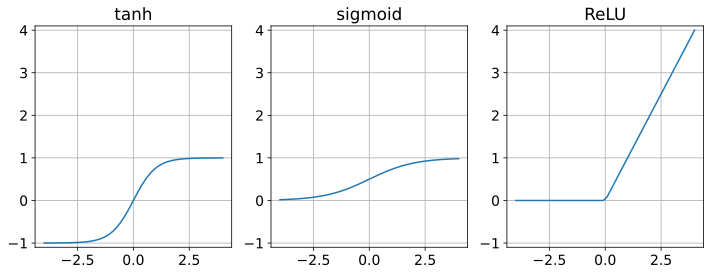

In [2]:
import numpy as np

%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import matplotlib.pyplot as plt
from notebook_utils import prepare_notebook_graphics
prepare_notebook_graphics()

def tanh(x):
    return 2. / (1. + np.exp(-2 * x)) - 1.

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def relu(x):
    y = x.copy()
    y[y < 0] = 0.
    return y

x = np.linspace(-4, 4, 50)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x, tanh(x))
plt.grid('on')
plt.ylim([-1.1, 4.1])
plt.title("tanh")

plt.subplot(1, 3, 2)
plt.plot(x, sigmoid(x))
plt.grid('on')
plt.ylim([-1.1, 4.1])
plt.title("sigmoid")

plt.subplot(1, 3, 3)
plt.plot(x, relu(x))
plt.grid('on')
plt.ylim([-1.1, 4.1])
plt.title("ReLU");

In practice the ReLU function (and some of its variants) is the most widely used nowadays, for reasons that will be discussed in more details in [our chapter dedicated to optimization](sec:sgd).

### The special case of the output layer

You might have noticed that in the MLP formulation provided in Equation (1), the output layer has its own activation function, denoted $\varphi_\text{out}$.
This is because the choice of activation functions for the output layer of a neural network is a bit specific to the problem at hand.

Indeed, you might have seen that the activation functions discussed in the previous section do not share the same range of output values.
It is hence of prime importance to pick an adequate activation function for the output layer such that our model outputs values that are consistent to the quantities it is supposed to predict.

If, for example, our model was supposed to be used in the Boston Housing dataset we discussed [in the previous chapter](sec:boston).
In this case, the goal is to predict housing prices, which are expected to be nonnegative quantities.
It would then be a good idea to use ReLU (which can output any positive value) as the activation function for the output layer in this case.

As stated earlier, in the case of binary classification, the model will have a single output neuron and this neuron will output the probability associated to the positive class.
This quantity is expected to lie in the $[0, 1]$ interval, and the sigmoid activation function is then the default choice in this setting.

Finally, when multi-class classification is at stake, we have one neuron per output class and each neuron is expected to output the probability for a given class.
In this context, the output values should be between 0 and 1, and they should sum to 1.
For this purpose, we use the softmax activation function defined as:

$$
  \forall i, \text{softmax}(o_i) = \frac{e^{o_i}}{\sum_j e^{o_j}}
$$

where, for all $i$, $o_i$'s are the values of the output neurons before applying the activation function.

## Declaring an MLP in `keras`

In order to define a MLP model in `keras`, one just has to stack layers.
As an example, if one wants to code a model made of:
* an input layer with 10 neurons,
* a hidden layer made of 20 neurons with ReLU activation,
* an output layer made of 3 neurons with softmax activation, 

the code will look like:

In [3]:
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.models import Sequential

model = Sequential([
    InputLayer(input_shape=(10, )),
    Dense(units=20, activation="relu"),
    Dense(units=3, activation="softmax")
])

model.summary()

2023-01-09 05:41:33.172675: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 05:41:33.933692: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-09 05:41:33.933730: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2023-01-09 05:41:35.405041: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-09 05:41:35.405174: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-09 05:41:35.405187: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 20)                220       


 dense_1 (Dense)             (None, 3)                 63        


Total params: 283


Trainable params: 283


Non-trainable params: 0


_________________________________________________________________


2023-01-09 05:41:36.826093: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-09 05:41:36.826635: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-09 05:41:36.826703: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az502-476): /proc/driver/nvidia/version does not exist
2023-01-09 05:41:36.827941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Note that `model.summary()` provides an interesting overview of a defined model and its parameters.

````{admonition} Exercise #1

Relying on what we have seen in this chapter, can you explain the number of parameters returned by `model.summary()` above?

```{admonition} Solution
:class: dropdown, tip

Our input layer is made of 10 neurons, and our first layer is fully connected, hence each of these neurons is connected to a neuron in the hidden layer through a parameter, which already makes $10 \times 20 = 200$ parameters.
Moreover, each of the hidden layer neurons has its own bias parameter, which is $20$ more parameters.
We then have 220 parameters, as output by `model.summary()` for the layer `"dense (Dense)"`.

Similarly, for the connection of the hidden layer neurons to those in the output layer, the total number of parameters is $20 \times 3 = 60$ for the weights plus $3$ extra parameters for the biases.

Overall, we have $220 + 63 = 283$ parameters in this model.
```
````

`````{admonition} Exercise #2

Declare, in `keras`, an MLP with one hidden layer made of 100 neurons and ReLU activation for the Iris dataset presented above.

````{admonition} Solution
:class: dropdown, tip

```python
model = Sequential([
    InputLayer(input_shape=(4, )),
    Dense(units=100, activation="relu"),
    Dense(units=3, activation="softmax")
])
```
````
`````

`````{admonition} Exercise #3

Same question for the full Boston Housing dataset shown below (the goal here is to predict the `PRICE` feature based on the other ones).

````{admonition} Solution
:class: dropdown, tip

```python
model = Sequential([
    InputLayer(input_shape=(6, )),
    Dense(units=100, activation="relu"),
    Dense(units=1, activation="relu")
])
```
````
`````

In [4]:
boston = pd.read_csv("data/boston.csv")[["RM", "CRIM", "INDUS", "NOX", "AGE", "TAX", "PRICE"]]
boston

,RM,CRIM,INDUS,NOX,AGE,TAX,PRICE
0,6.575,0.00632,2.31,0.538,65.2,296.0,24.0
1,6.421,0.02731,7.07,0.469,78.9,242.0,21.6
2,7.185,0.02729,7.07,0.469,61.1,242.0,34.7
3,6.998,0.03237,2.18,0.458,45.8,222.0,33.4
4,7.147,0.06905,2.18,0.458,54.2,222.0,36.2
...,...,...,...,...,...,...,...
501,6.593,0.06263,11.93,0.573,69.1,273.0,22.4
502,6.120,0.04527,11.93,0.573,76.7,273.0,20.6
503,6.976,0.06076,11.93,0.573,91.0,273.0,23.9
504,6.794,0.10959,11.93,0.573,89.3,273.0,22.0
